In [ ]:
# Further analyses for OXT West regarding computer ownership and internet access in Oakland and other cities
# http://www.otxwest.org
# American Community Survey data from IPUMS: https://usa.ipums.org/usa/

In [276]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [277]:
mypath = '/Users/laura/Dropbox/posting/OXTWest'
path_acs_internet = os.path.join(mypath, 'oxtwest.csv')

In [278]:
oxt = pd.read_csv(path_acs_internet)

In [279]:
print list(oxt.columns.values) # var names
print oxt['city'].head()
oxt['n'] = 1
print oxt.groupby(by=['city'])['n'].sum() # number of people in the sample each city
print len(oxt.index)

['year', 'datanum', 'serial', 'hhwt', 'city', 'gq', 'rentgrs', 'foodstmp', 'lingisol', 'cilaptop', 'cihand', 'ciothcomp', 'cinethh', 'cimodem', 'cisat', 'cidsl', 'cifiber', 'cibrdbnd', 'cidial', 'ciothsvc', 'multgen', 'multgend', 'pernum', 'perwt', 'relate', 'related', 'age', 'race', 'raced', 'hispan', 'hispand', 'citizen', 'speakeng', 'empstat', 'empstatd', 'poverty']
0          Oakland, CA
1          Oakland, CA
2    San Francisco, CA
3    San Francisco, CA
4    San Francisco, CA
Name: city, dtype: object
city
Chicago, IL           45243
Cleveland, OH          8109
Detroit, MI            9561
Flint, MI              1362
Manchester, NH         1872
Miami, FL              7715
Minneapolis, MN        5094
New Orleans, LA        9575
New York, NY         140629
Oakland, CA            9093
Providence, RI         3168
San Francisco, CA     15451
Seattle, WA           11424
Name: n, dtype: int64
268296


In [201]:
# What does access to Internet at home look like for poor Oakland residents based on age?
# first creating variables needed

In [280]:
# internet access variable codebook
# 0: N/A (GQ)
# 1: Yes, with a subscription to an Internet Service
# 2: Yes, without a subscription to an Internet Service
# 3: No Internet access at this house, apartment, or mobile home

print oxt.groupby(by=['cilaptop'])['perwt'].sum().div(oxt.hhwt.sum()) * 100 # response options

test = pd.get_dummies(oxt['cinethh'])
test.rename(columns={'No Internet access at this house, apartment, or mobile home':'no_internet'}, inplace=True)
print test.head()
# keeping just the second column, merging to main data set
test = test[['no_internet']]
oxt = pd.concat([oxt, test], axis = 1)

cilaptop
N/A (GQ)     2.557585
No          20.738400
Yes         83.519870
Name: perwt, dtype: float64
   N/A (GQ)  no_internet  Yes, with a subscription to an Internet Service  \
0         0            1                                                0   
1         0            1                                                0   
2         0            0                                                1   
3         0            0                                                1   
4         0            0                                                1   

   Yes, without a subscription to an Internet Service  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   


In [281]:
# Age variable
print oxt.groupby(by=['age'])['n'].sum() # absolute/sampled numbers
oxt.age[oxt.age == 'Less than 1 year old'] = 0 # recoding
oxt.age[oxt.age == '90 (90+ in 1980 and 1990)'] = 91 # recoding
oxt.age = oxt.age.astype(int)

# Age variable
oxt.loc[(oxt['age'] >= 0) & (oxt['age'] <= 10), 'age_ind'] = '0-10'
oxt.loc[(oxt['age'] >= 11) & (oxt['age'] <= 14), 'age_ind'] = '11-14'
oxt.loc[(oxt['age'] >= 15) & (oxt['age'] <= 18), 'age_ind'] = '15-18'
oxt.loc[(oxt['age'] >= 19) & (oxt['age'] <= 22), 'age_ind'] = '19-22'
oxt.loc[(oxt['age'] >= 22) & (oxt['age'] <= 25), 'age_ind'] = '22-25'
oxt.loc[(oxt['age'] >= 21) & (oxt['age'] <= 29), 'age_ind'] = '26-29'
oxt.loc[(oxt['age'] >= 30) & (oxt['age'] <= 39), 'age_ind'] = '30-39'
oxt.loc[(oxt['age'] >= 40) & (oxt['age'] <= 49), 'age_ind'] = '40-49'
oxt.loc[(oxt['age'] >= 50) & (oxt['age'] <= 59), 'age_ind'] = '50-59'
oxt.loc[(oxt['age'] >= 61), 'age_ind'] = '61+'
print len(oxt.index)

age
1      2930
10     2958
11     2828
12     2848
13     2827
14     2775
15     2886
16     3001
17     3118
18     3750
19     3744
2      2842
20     3771
21     3699
22     4062
...
82                           1014
83                            972
84                            955
85                            867
86                            878
87                            724
88                            653
89                            539
9                            2798
90 (90+ in 1980 and 1990)     459
91                            238
93                            103
94                            753
95                            800
Less than 1 year old         2915
Name: n, Length: 95, dtype: int64
268296


In [282]:
# just Oakland:
oxt_oakland = oxt[oxt['city'] == 'Oakland, CA']
print len(oxt.index)

# just Poor:
oxt_oakland_poor = oxt_oakland[oxt_oakland.poverty < 100]

268296


In [283]:
# defining the function to summarize weighted internet access in the home by age group
grouped = oxt_oakland_poor.groupby('age_ind')
minifun = lambda x: np.average(x.no_internet, weights = x.perwt)
print str(grouped.apply(minifun)) # proportion of poor Oaklanders without internet access in their home

age_ind
0-10       0.317152
11-14      0.329046
15-18      0.180771
19-22      0.155227
26-29      0.220203
30-39      0.273447
40-49      0.264167
50-59      0.351251
61+        0.478935
dtype: float64


In [284]:
# doing the same thing for just households...
# data set for households - just keeping the household head as representative (relate == 1)
print oxt.groupby(by=['relate'])['n'].sum()
oxt_hh_oakland_poor = oxt_oakland_poor[oxt_oakland_poor['relate'] == 'Head/Householder']

relate
Child                        69455
Child-in-law                  1108
Grandchild                    6967
Head/Householder            105917
Institutional inmates         4123
Other non-relatives          13647
Other relatives               5187
Parent                        4451
Parent-in-Law                  771
Partner, friend, visitor     13274
Sibling                       4500
Sibling-in-Law                 749
Spouse                       38147
Name: n, dtype: int64


In [285]:
# defining the function to summarize weighted internet access in the home by age group - unit is household!
grouped = oxt_hh_oakland_poor.groupby('age_ind')
minifun = lambda x: np.average(x.no_internet, weights = x.hhwt)
print str(grouped.apply(minifun)) # proportion of poor Oakland households without internet access in their home

age_ind
15-18      1.000000
19-22      0.388397
26-29      0.237574
30-39      0.316932
40-49      0.334739
50-59      0.502105
61+        0.650864
dtype: float64


In [ ]:
# How does computer ownership of poor residents in Oakland compare with other US cities?

In [286]:
# creating a NO laptop variable
oxt = pd.concat([oxt, pd.get_dummies(oxt["cilaptop"])[[2]]], axis = 1)
# renaming
oxt = oxt.rename(columns = {'Yes':'cilaptop_ind'})

print oxt.groupby(by=['cilaptop_ind'])['n'].sum()

oxt.loc[(oxt['cilaptop_ind'] == 1), 'no_comp'] = 0
oxt.loc[(oxt['cilaptop_ind'] == 0), 'no_comp'] = 1

cilaptop_ind
0                58770
1               209526
Name: n, dtype: int64


In [288]:
print oxt.groupby(by = ['no_comp'])['n'].sum()

no_comp
0          209526
1           58770
Name: n, dtype: int64


In [289]:
# Summarizing computer ownership among the poor in the 6 cities available
print oxt.groupby(by = ['city'])['n'].sum() # absolute/sampled numbers
# keeping just poor
oxt_poor = oxt[oxt.poverty < 100]

city
Chicago, IL           45243
Cleveland, OH          8109
Detroit, MI            9561
Flint, MI              1362
Manchester, NH         1872
Miami, FL              7715
Minneapolis, MN        5094
New Orleans, LA        9575
New York, NY         140629
Oakland, CA            9093
Providence, RI         3168
San Francisco, CA     15451
Seattle, WA           11424
Name: n, dtype: int64


In [290]:
# Function to summarize proportion of poor in the major cities that own computer
grouped = oxt_poor.groupby('city')
minifun = lambda x: np.average(x.no_comp, weights = x.perwt)
print str(grouped.apply(minifun))

city
Chicago, IL          0.463431
Cleveland, OH        0.546172
Detroit, MI          0.504711
Flint, MI            0.559227
Manchester, NH       0.376820
Miami, FL            0.470422
Minneapolis, MN      0.397932
New Orleans, LA      0.577662
New York, NY         0.383169
Oakland, CA          0.434421
Providence, RI       0.555197
San Francisco, CA    0.381865
Seattle, WA          0.356036
dtype: float64


In [291]:
# Getting ready to graph
comp_graph = pd.DataFrame((grouped.apply(minifun)))
comp_graph.rename(columns = {0: 'comp'}, inplace = True)
comp_graph['comp'] = comp_graph['comp'] * 100
comp_graph = comp_graph.sort(['comp'], ascending = [0])

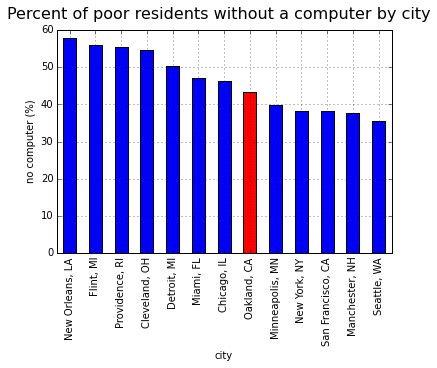

In [292]:
ax = comp_graph['comp'].plot(kind = 'bar', color = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b'])
ax.set_ylabel("no computer (%)")
plt.suptitle('Percent of poor residents without a computer by city', size = 16) # INDIVIDUAL LEVEL

plt.savefig('/Users/laura/Dropbox/posting/OXTWest/comp_ind.png', bbox_inches = 'tight', dpi = 200)

In [293]:
# At the household level ("proportion of poor households with no compuer")
oxt_poor_hh = oxt_poor[oxt_poor['relate'] == 'Head/Householder']

In [294]:
grouped = oxt_poor_hh.groupby('city')
minifun = lambda x: np.average(x.no_comp, weights=x.hhwt)
print str(grouped.apply(minifun))

city
Chicago, IL          0.479076
Cleveland, OH        0.575273
Detroit, MI          0.578657
Flint, MI            0.609571
Manchester, NH       0.376173
Miami, FL            0.548430
Minneapolis, MN      0.366480
New Orleans, LA      0.603201
New York, NY         0.417508
Oakland, CA          0.484716
Providence, RI       0.511022
San Francisco, CA    0.423388
Seattle, WA          0.266391
dtype: float64


In [295]:
# getting ready to graph
comp_graph_hh = pd.DataFrame((grouped.apply(minifun)))
print comp_graph_hh

                          0
city                       
Chicago, IL        0.479076
Cleveland, OH      0.575273
Detroit, MI        0.578657
Flint, MI          0.609571
Manchester, NH     0.376173
Miami, FL          0.548430
Minneapolis, MN    0.366480
New Orleans, LA    0.603201
New York, NY       0.417508
Oakland, CA        0.484716
Providence, RI     0.511022
San Francisco, CA  0.423388
Seattle, WA        0.266391


In [296]:
comp_graph_hh.rename(columns = {0: 'comp'}, inplace = True)
comp_graph_hh['comp'] = comp_graph_hh['comp'] * 100
comp_graph_hh = comp_graph_hh.sort(['comp'], ascending = [0])

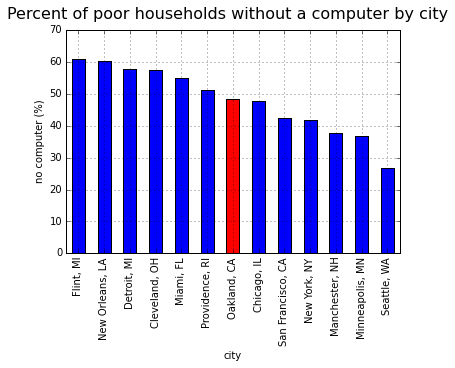

In [297]:
ax = comp_graph_hh['comp'].plot(kind = 'bar', color = ['b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b'])
ax.set_ylabel("no computer (%)")
plt.suptitle('Percent of poor households without a computer by city', size=16) # household level

In [ ]:
# Are there other cities in the East Bay that have data? (Richmond, Pittsburg, Hayward, etc.) NO

In [ ]:
# What does computer ownership look like with the employment status (EMPSTAT) variable
# NOTE: I am doing this just for Oakland

In [298]:
print oxt_oakland.groupby(by = ['empstat'])['n'].sum() # absolute/sampled numbers

empstat
Employed              4493
Not in labor force    2587
Unemployed             443
Name: n, dtype: int64


In [299]:
# Proportion of each empstat category with computer
# just Oakland again because no_comp has been created:
oxt_oakland = oxt[oxt['city'] == 'Oakland, CA']
grouped = oxt_oakland.groupby('empstat')
minifun = lambda x: np.average(x.no_comp, weights = x.perwt)
print str(grouped.apply(minifun)) # proportion of Oaklanders without internet access in their home

empstat
Employed              0.120885
Not in labor force    0.302571
Unemployed            0.253451
dtype: float64


In [300]:
# at the household level - whether or not the head of household is employed
oxt_oakland_hh = oxt_oakland[oxt_oakland['relate'] == 'Head/Householder']
grouped = oxt_oakland_hh.groupby('empstat')
minifun = lambda x: np.average(x.no_comp, weights = x.hhwt)
print str(grouped.apply(minifun))

empstat
Employed              0.120145
Not in labor force    0.386254
Unemployed            0.311451
dtype: float64


In [ ]:
# What does Internet and computer access look like by race/ethnicity?

In [301]:
print oxt.groupby(by = ['race'])['n'].sum() # absolute/sampled numbers

race
American Indian or Alaska Native      1042
Black/Negro                          71323
Chinese                              15870
Japanese                               908
Other Asian or Pacific Islander      16633
Other race, nec                      23943
Three or more major races             1026
Two major races                       7824
White                               129727
Name: n, dtype: int64


In [302]:
print oxt.groupby(by = ['hispan'])['n'].sum()

hispan
Cuban             3454
Mexican          17238
Not Hispanic    208901
Other            24761
Puerto Rican     13942
Name: n, dtype: int64


In [303]:
# variable for Black/Negro only, white only, Hispanic origin only, other (including mixed race) - only in Oakland
oxt_oakland.loc[(oxt_oakland['race'] == "Black/Negro"), 'race_var'] = 'Black only'
oxt_oakland.loc[(oxt_oakland['race'] == "White"), 'race_var'] = 'White only'
oxt_oakland.loc[(oxt_oakland['hispan'] != "Not Hispanic"), 'race_var'] = 'Hispanic'
oxt_oakland['race_var'].fillna('Other', inplace=True)

print oxt_oakland.groupby(by = ['race_var'])['n'].sum()

race_var
Black only    1882
Hispanic      2118
Other         2110
White only    2983
Name: n, dtype: int64


/Users/laura/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


In [304]:
# Computer by race/ethnicity
grouped = oxt_oakland.groupby('race_var')
minifun = lambda x: np.average(x.no_comp, weights = x.perwt)
print str(grouped.apply(minifun))

race_var
Black only    0.319171
Hispanic      0.247507
Other         0.157748
White only    0.072315
dtype: float64


In [305]:
# Internet by race/ethnicity
grouped = oxt_oakland.groupby('race_var')
minifun = lambda x: np.average(x.no_internet, weights = x.perwt)
print str(grouped.apply(minifun))

race_var
Black only    0.232598
Hispanic      0.219699
Other         0.112911
White only    0.049504
dtype: float64


In [306]:
# At the household level - first computer by race/ethnicity
oxt_oakland_hh = oxt_oakland[oxt_oakland['relate'] == 'Head/Householder']
grouped = oxt_oakland_hh.groupby('race_var')
minifun = lambda x: np.average(x.no_comp, weights = x.hhwt)
print str(grouped.apply(minifun))

race_var
Black only    0.356790
Hispanic      0.266187
Other         0.203249
White only    0.075617
dtype: float64


In [307]:
# At the household level - then internet by race/ethnicity
oxt_oakland_hh = oxt_oakland[oxt_oakland['relate'] == 'Head/Householder']
grouped = oxt_oakland.groupby('race_var')
minifun = lambda x: np.average(x.no_comp, weights = x.hhwt)
print str(grouped.apply(minifun))

race_var
Black only    0.322201
Hispanic      0.246084
Other         0.158864
White only    0.074195
dtype: float64


In [308]:
len(oxt_oakland.index)
oxt_oakland.head()

,year,datanum,serial,hhwt,city,gq,rentgrs,foodstmp,lingisol,cilaptop,...,speakeng,empstat,empstatd,poverty,n,no_internet,age_ind,cilaptop_ind,no_comp,race_var
0,2013,1,66410,97,"Oakland, CA",Households under 1970 definition,790,Yes,Linguistically isolated,No,...,"Yes, but not well",Not in labor force,Not in Labor Force,60,1,1,61+,0,1,Other
1,2013,1,66410,97,"Oakland, CA",Households under 1970 definition,790,Yes,Linguistically isolated,No,...,Does not speak English,Not in labor force,Not in Labor Force,60,1,1,61+,0,1,Other
13,2013,1,66474,62,"Oakland, CA",Households under 1970 definition,0,No,Not linguistically isolated,Yes,...,"Yes, speaks only English",Not in labor force,Not in Labor Force,117,1,0,61+,1,0,Black only
18,2013,1,66558,55,"Oakland, CA",Households under 1970 definition,0,No,Not linguistically isolated,Yes,...,"Yes, speaks well",Not in labor force,Not in Labor Force,220,1,0,61+,1,0,Other
19,2013,1,66558,55,"Oakland, CA",Households under 1970 definition,0,No,Not linguistically isolated,Yes,...,"Yes, speaks well",Employed,"Has job, not working",220,1,0,50-59,1,0,Other
